# Combining

In [1]:
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt
from sklearn import preprocessing

# Data Cleaning

In [2]:
# opel_corsa_01 = pd.read_csv("data/opel_corsa_01.csv", sep = ';')
# opel_corsa_01["Car"] = "opel"
# opel_corsa_01["Journey"] = 1


# opel_corsa_02 = pd.read_csv("data/opel_corsa_02.csv", sep = ';')
# opel_corsa_02["Car"] = "opel"
# opel_corsa_02["Journey"] = 2

# peugeot_207_01 = pd.read_csv("data/peugeot_207_01.csv", sep = ';')
# peugeot_207_01["Car"] = "peugeot"
# peugeot_207_01["Journey"] = 3

# peugeot_207_02 = pd.read_csv("data/peugeot_207_01.csv", sep = ';')
# peugeot_207_02["Car"] = "peugeot"
# peugeot_207_02["Journey"] = 4

# dataset = [opel_corsa_01, opel_corsa_02, peugeot_207_01, peugeot_207_02]

# combined = pd.concat(dataset)
# combined= combined.reset_index()

# data_pre_cleaning = combined.drop('Unnamed: 0', axis = 1)

# data_pre_cleaning.to_csv("data/pre_cleaning_dataset.csv",index = False)

# Removing  Nulls

In [3]:
raw_data = pd.read_csv('pre_cleaning_dataset.csv')

In [4]:
#Putting the class driving Style in the last column
column_names = ["AltitudeVariation", "VehicleSpeedInstantaneous", "VehicleSpeedAverage",'VehicleSpeedVariance','VehicleSpeedVariation','LongitudinalAcceleration','EngineLoad','EngineCoolantTemperature','ManifoldAbsolutePressure','EngineRPM','MassAirFlow','IntakeAirTemperature','VerticalAcceleration','FuelConsumptionAverage','roadSurface','traffic','Make','Source File','drivingStyle']
raw_data = raw_data.reindex(columns=column_names)

In [5]:
# Checking for null values
raw_data.isnull().sum()

AltitudeVariation             0
VehicleSpeedInstantaneous     6
VehicleSpeedAverage           0
VehicleSpeedVariance          0
VehicleSpeedVariation         0
LongitudinalAcceleration      0
EngineLoad                   10
EngineCoolantTemperature     10
ManifoldAbsolutePressure     10
EngineRPM                    10
MassAirFlow                  10
IntakeAirTemperature         10
VerticalAcceleration          0
FuelConsumptionAverage       10
roadSurface                   0
traffic                       0
Make                          0
Source File                   0
drivingStyle                  0
dtype: int64

In [6]:
# Deleting the NULL values
raw_data = raw_data.dropna(subset = ['EngineLoad']) 
raw_data = raw_data.dropna(subset = ['VehicleSpeedInstantaneous']) 

In [7]:
raw_data.isnull().sum()

AltitudeVariation            0
VehicleSpeedInstantaneous    0
VehicleSpeedAverage          0
VehicleSpeedVariance         0
VehicleSpeedVariation        0
LongitudinalAcceleration     0
EngineLoad                   0
EngineCoolantTemperature     0
ManifoldAbsolutePressure     0
EngineRPM                    0
MassAirFlow                  0
IntakeAirTemperature         0
VerticalAcceleration         0
FuelConsumptionAverage       0
roadSurface                  0
traffic                      0
Make                         0
Source File                  0
drivingStyle                 0
dtype: int64

In [8]:
raw_data.head()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,Make,Source File,drivingStyle
0,-2.299988,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68.0,106.0,1796.0,15.81,24.0,-0.1133,19.497335,SmoothCondition,LowCongestionCondition,Opal Corsa,1,EvenPaceStyle
1,-2.099976,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68.0,103.0,1689.0,14.65,22.0,-0.1289,19.515722,SmoothCondition,LowCongestionCondition,Opal Corsa,1,EvenPaceStyle
2,-1.500000,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68.0,103.0,1599.0,11.85,21.0,-0.1328,19.441765,SmoothCondition,LowCongestionCondition,Opal Corsa,1,EvenPaceStyle
3,0.100037,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69.0,104.0,1620.0,12.21,20.0,-0.0859,19.388769,SmoothCondition,LowCongestionCondition,Opal Corsa,1,EvenPaceStyle
4,0.099976,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69.0,104.0,1708.0,11.91,21.0,-0.0664,19.301638,SmoothCondition,LowCongestionCondition,Opal Corsa,1,EvenPaceStyle


# Removing Outliers - using IQR

In [9]:
#https://www.youtube.com/watch?v=Vc4cXIAa69Y

In [10]:
raw_data_x = raw_data.drop(['Source File','Make','traffic','roadSurface','drivingStyle'], axis = 1)

In [11]:
raw_data_x.head()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage
0,-2.299988,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68.0,106.0,1796.0,15.81,24.0,-0.1133,19.497335
1,-2.099976,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68.0,103.0,1689.0,14.65,22.0,-0.1289,19.515722
2,-1.500000,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68.0,103.0,1599.0,11.85,21.0,-0.1328,19.441765
3,0.100037,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69.0,104.0,1620.0,12.21,20.0,-0.0859,19.388769
4,0.099976,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69.0,104.0,1708.0,11.91,21.0,-0.0664,19.301638


In [12]:
raw_data_x.shape

(27514, 14)

In [13]:
raw_data_x.describe()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage
count,27514.000000,27514.000000,27514.000000,27514.000000,27514.000000,27514.000000,27514.000000,27514.000000,27514.000000,27514.000000,27514.000000,27514.000000,27514.000000,27514.000000
mean,-0.293480,43.564485,43.776130,173.779733,-0.014187,0.946743,38.756299,71.450970,116.768918,1553.102929,17.068457,27.043578,0.231812,14.272438
std,2.184945,35.693410,33.055128,190.983263,2.442012,1.457649,28.329016,15.433343,20.460458,592.917996,9.810081,12.525937,3.268870,4.324874
min,-24.600006,0.000000,0.000000,0.000000,-18.000002,-2.380000,0.000000,12.000000,88.000000,0.000000,0.880000,7.000000,-2.763100,7.271883
25%,-1.500000,14.861880,18.089999,44.291667,-0.900002,0.097825,18.431374,67.000000,103.000000,941.500000,7.850000,17.000000,-0.782200,10.681453
50%,-0.199997,36.000000,33.544033,112.013157,0.000000,0.785000,31.372549,79.000000,108.000000,1557.000000,16.490000,22.000000,-0.247400,13.769692
75%,0.700012,63.899998,60.587492,232.725667,0.900002,1.450675,67.058823,80.000000,126.000000,2059.000000,23.830000,37.000000,0.164100,16.677682
max,10.700012,124.749725,121.330733,1418.370369,97.199997,8.477800,100.000000,89.000000,252.000000,3167.000000,73.250000,65.000000,17.944800,45.336861


In [14]:
# Boxplot to visualize Data using a function 

def boxplot(raw_data,feature):
    raw_data.boxplot(column=[feature])
    plt.grid(False)
    plt.show()

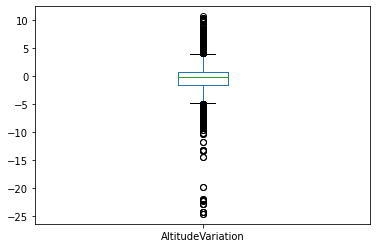

None


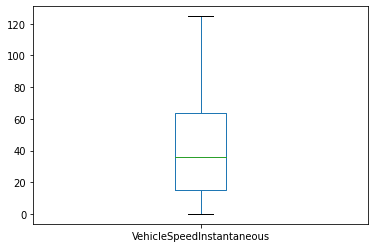

None


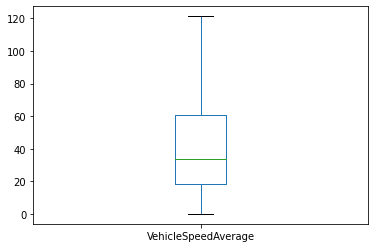

None


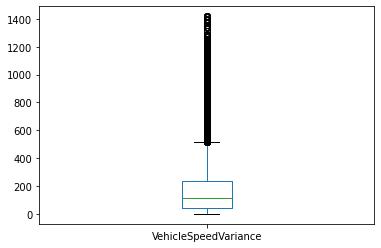

None


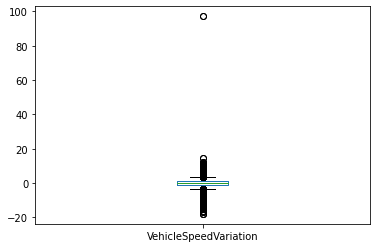

None


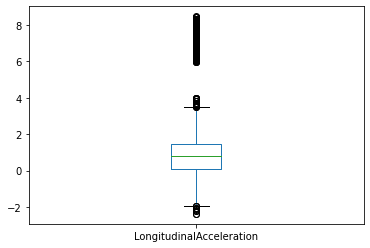

None


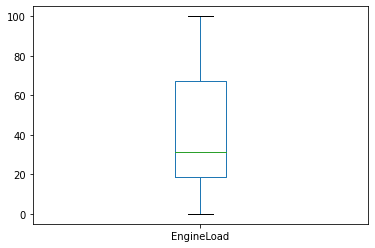

None


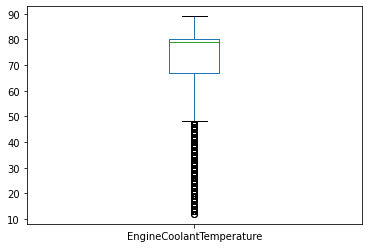

None


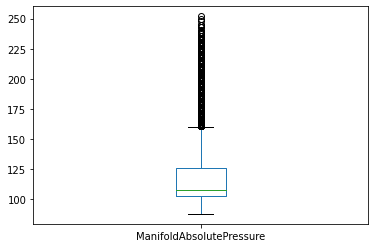

None


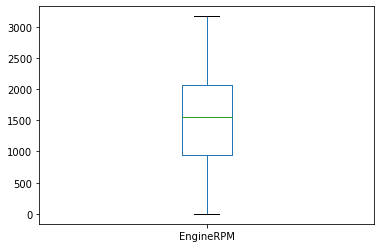

None


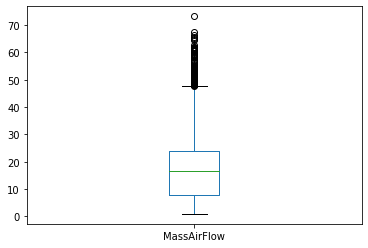

None


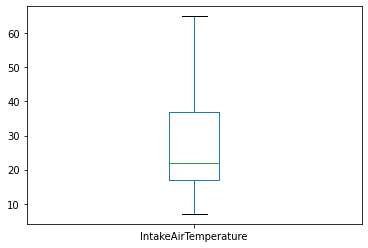

None


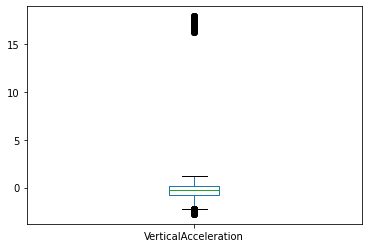

None


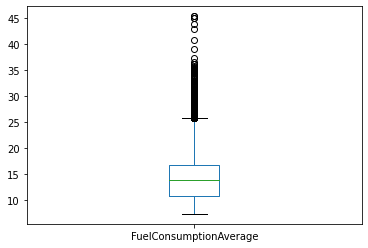

None


In [15]:

for feature in raw_data_x:
    print(boxplot(raw_data_x,feature))

In [16]:
# function to remove outliers using percentiles:
def outlier(raw_data,feature):
    Q1 = raw_data[feature].quantile(0.25)
    Q3 = raw_data[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    list_outliers =raw_data.index[(raw_data[feature] < lower) | (raw_data[feature] > upper) ]
    return list_outliers

#Creating a list of all outliers index
index = []

# avoiding  categorical columns in order not to get errors
for feature in ['AltitudeVariation', 'VehicleSpeedInstantaneous','VehicleSpeedAverage','VehicleSpeedVariance','VehicleSpeedVariation','LongitudinalAcceleration','EngineLoad','EngineCoolantTemperature','ManifoldAbsolutePressure','EngineRPM','MassAirFlow','IntakeAirTemperature','VerticalAcceleration','FuelConsumptionAverage']:
    index.extend(outlier(raw_data,feature))
    
#Removing  outliers
def delete(raw_data,list):
    list = sorted(set(list))
    raw_data = raw_data.drop(list)
    return raw_data

raw_data_notout1 = delete(raw_data,index)

In [17]:
raw_data_notout1.shape


(18315, 19)

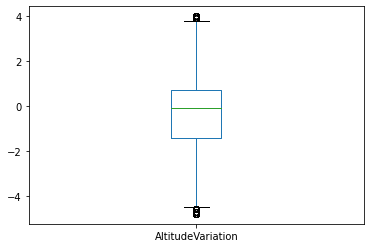

None


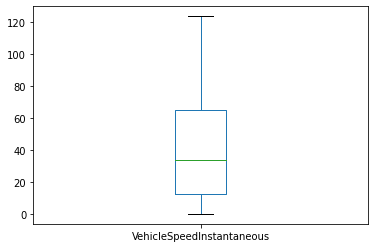

None


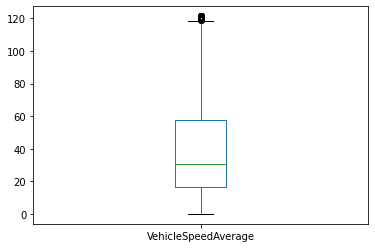

None


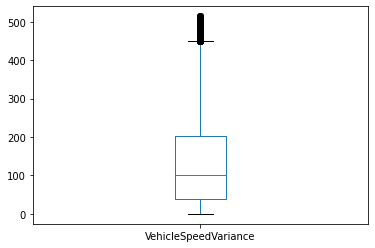

None


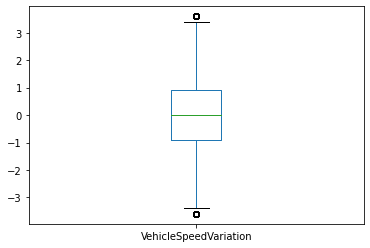

None


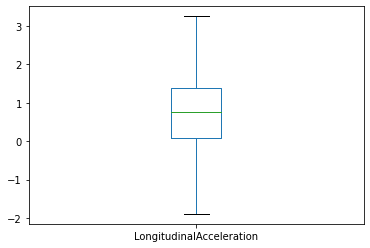

None


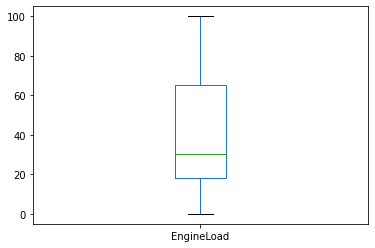

None


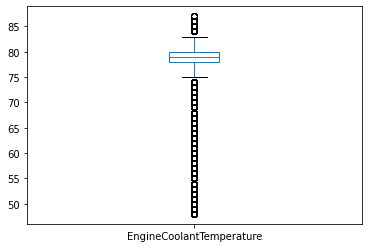

None


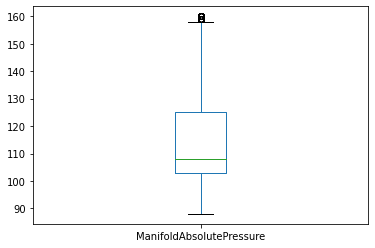

None


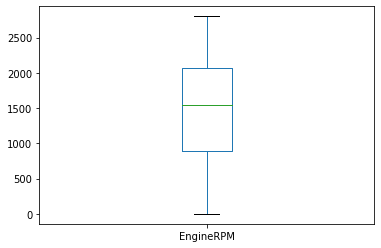

None


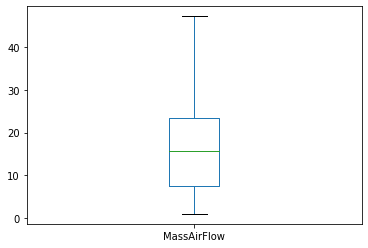

None


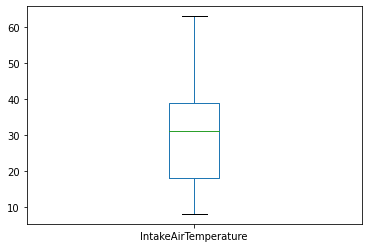

None


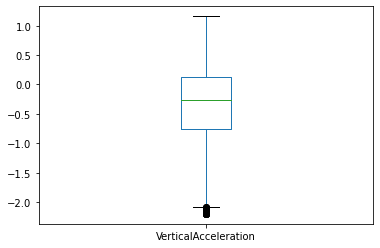

None


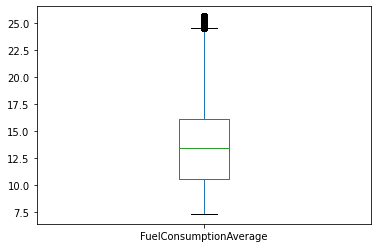

None


In [18]:
for feature in ['AltitudeVariation', 'VehicleSpeedInstantaneous','VehicleSpeedAverage','VehicleSpeedVariance','VehicleSpeedVariation','LongitudinalAcceleration','EngineLoad','EngineCoolantTemperature','ManifoldAbsolutePressure','EngineRPM','MassAirFlow','IntakeAirTemperature','VerticalAcceleration','FuelConsumptionAverage']:
    print(boxplot(raw_data_notout1,feature))

# Imbalanced Data - Undersampling

<AxesSubplot:xlabel='drivingStyle', ylabel='count'>

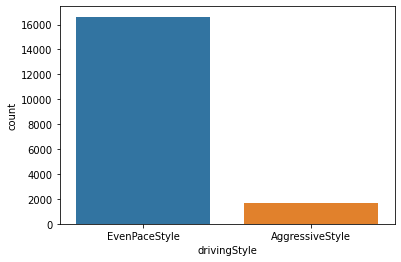

In [19]:
sns.countplot(x = 'drivingStyle', data = raw_data_notout1)

In [20]:
#Class count
Even =  raw_data_notout1.loc[raw_data['drivingStyle'] == 'EvenPaceStyle']
print(len(Even))

16626


In [21]:
Aggr =  raw_data_notout1.loc[raw_data['drivingStyle'] == 'AggressiveStyle']
print(len(Aggr))

1689


In [22]:
# taking just the same amount of Even and Aggressive samples , reducing the ammount of Even cases using .sample funtion
Even_under_data = Even.sample(len(Aggr))
print(Even_under_data.shape)

(1689, 19)


In [23]:
data_Undersampling = pd.concat([Even_under_data,Aggr], axis=0)

<AxesSubplot:xlabel='drivingStyle', ylabel='count'>

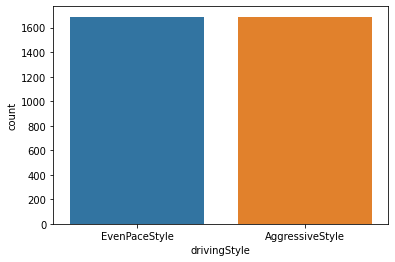

In [24]:
sns.countplot(x = 'drivingStyle', data = data_Undersampling)

# Standarising Data

In [25]:
std_scale = preprocessing.StandardScaler().fit(data_Undersampling[['AltitudeVariation', 'VehicleSpeedInstantaneous','VehicleSpeedAverage','VehicleSpeedVariance','VehicleSpeedVariation','LongitudinalAcceleration','EngineLoad','EngineCoolantTemperature','ManifoldAbsolutePressure','EngineRPM','MassAirFlow','IntakeAirTemperature','VerticalAcceleration','FuelConsumptionAverage']])
df_std = std_scale.transform(data_Undersampling[['AltitudeVariation', 'VehicleSpeedInstantaneous','VehicleSpeedAverage','VehicleSpeedVariance','VehicleSpeedVariation','LongitudinalAcceleration','EngineLoad','EngineCoolantTemperature','ManifoldAbsolutePressure','EngineRPM','MassAirFlow','IntakeAirTemperature','VerticalAcceleration','FuelConsumptionAverage']])

In [26]:
df_std.shape # numpy it should be DF

(3378, 14)

In [27]:
data_Undersampling.shape

(3378, 19)

In [28]:
data_Undersampling.head()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,Make,Source File,drivingStyle
25862,-2.299999,26.099998,18.914999,153.364340,0.9,1.5283,40.784313,79.0,105.0,1658.0,15.41,36.0,-1.3680,16.997131,UnevenCondition,LowCongestionCondition,Peugeot 207,2,EvenPaceStyle
18711,-2.900002,24.299999,19.439999,53.328200,-0.9,0.9219,20.784313,79.0,107.0,1525.5,12.19,33.0,-0.1969,16.592434,UnevenCondition,LowCongestionCondition,Peugeot 207,1,EvenPaceStyle
27424,-1.500000,23.400000,10.515000,121.458577,-0.9,1.6638,0.000000,79.0,107.0,1350.0,17.27,31.0,-0.8661,15.757257,UnevenCondition,LowCongestionCondition,Peugeot 207,2,EvenPaceStyle
18482,0.000000,100.799995,103.349997,3.079828,0.0,1.2700,74.509804,80.0,142.0,2355.5,27.58,53.0,-0.4621,9.227240,SmoothCondition,LowCongestionCondition,Peugeot 207,1,EvenPaceStyle
191,0.599976,57.195721,61.425349,23.574156,0.0,0.5039,5.882353,79.0,112.0,1792.0,19.41,12.0,-0.3242,14.093669,SmoothCondition,LowCongestionCondition,Opal Corsa,1,EvenPaceStyle


#Adding drivingStyle column

In [29]:
df_std_data = pd.DataFrame(data=df_std, columns=['AltitudeVariation', 'VehicleSpeedInstantaneous','VehicleSpeedAverage','VehicleSpeedVariance','VehicleSpeedVariation','LongitudinalAcceleration','EngineLoad','EngineCoolantTemperature','ManifoldAbsolutePressure','EngineRPM','MassAirFlow','IntakeAirTemperature','VerticalAcceleration','FuelConsumptionAverage'])

In [30]:
#Adding Drivestyle column
ds_df = data_Undersampling['drivingStyle'].to_frame()
ds_df= ds_df.reset_index(drop=True)
df_std_data['drivingStyle'] = ds_df['drivingStyle']

In [31]:
df_std_data

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,drivingStyle
0,-1.197854,-0.256452,-0.569951,-0.089014,0.551740,1.008524,0.312314,0.32179,-0.561479,0.279472,0.033566,0.896173,-1.799769,0.542125,EvenPaceStyle
1,-1.580882,-0.314218,-0.551798,-0.883396,-0.658563,0.379113,-0.472666,0.32179,-0.423939,0.051844,-0.346485,0.641095,0.074096,0.446869,EvenPaceStyle
2,-0.687153,-0.343101,-0.860406,-0.342376,-0.658563,1.149166,-1.288430,0.32179,-0.423939,-0.249656,0.253100,0.471042,-0.996684,0.250287,EvenPaceStyle
3,0.270413,2.140852,2.349635,-1.282416,-0.053411,0.740422,1.636007,0.43672,1.983011,1.477741,1.469974,2.341619,-0.350248,-1.286730,EvenPaceStyle
4,0.653424,0.741485,0.899968,-1.119672,-0.053411,-0.054749,-1.057553,0.32179,-0.080089,0.509677,0.505681,-1.144456,-0.129596,-0.141283,EvenPaceStyle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3373,0.398086,-0.458634,-0.081884,-0.660320,-0.053411,1.379279,-0.164830,0.32179,-0.699019,-1.284719,-1.307237,0.386016,-1.889054,-0.084099,AggressiveStyle
3374,0.398089,-0.660816,-0.127527,-0.680147,-0.053411,1.364021,-0.149439,0.32179,-0.699019,-1.270976,-1.294254,0.386016,-1.895775,-0.047341,AggressiveStyle
3375,-0.176452,-1.094064,-0.184062,-0.558715,-2.474018,1.437404,-0.149439,0.32179,-0.699019,-1.274411,-1.270649,0.386016,-2.009861,-0.047341,AggressiveStyle
3376,0.078900,-1.094064,-0.212589,-0.493258,-0.053411,1.480687,-0.087872,0.32179,-0.699019,-1.276988,-1.264747,0.386016,-2.083785,-0.047341,AggressiveStyle


# Drivingstyle 1-0

In [32]:
df_std_data = df_std_data.replace('EvenPaceStyle', 1)
df_std_data = df_std_data.replace('AggressiveStyle', 0)

In [33]:
df_std_data.head()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,drivingStyle
0,-1.197854,-0.256452,-0.569951,-0.089014,0.551740,1.008524,0.312314,0.32179,-0.561479,0.279472,0.033566,0.896173,-1.799769,0.542125,1
1,-1.580882,-0.314218,-0.551798,-0.883396,-0.658563,0.379113,-0.472666,0.32179,-0.423939,0.051844,-0.346485,0.641095,0.074096,0.446869,1
2,-0.687153,-0.343101,-0.860406,-0.342376,-0.658563,1.149166,-1.288430,0.32179,-0.423939,-0.249656,0.253100,0.471042,-0.996684,0.250287,1
3,0.270413,2.140852,2.349635,-1.282416,-0.053411,0.740422,1.636007,0.43672,1.983011,1.477741,1.469974,2.341619,-0.350248,-1.286730,1
4,0.653424,0.741485,0.899968,-1.119672,-0.053411,-0.054749,-1.057553,0.32179,-0.080089,0.509677,0.505681,-1.144456,-0.129596,-0.141283,1


# Feature Selection - Decision Tree

In [34]:
# Split the data into X & y

X = df_std_data.drop('drivingStyle', axis = 1).values # . values to create a vector/ array
y = df_std_data['drivingStyle']

y = y.astype(int)

print(X.shape)
print(y.shape)

(3378, 14)
(3378,)


In [35]:
# Run a Tree-based estimators (i.e. decision trees & random forests)

dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [36]:
# Running Feature Importance

fi_col = []
fi = []

for i,column in enumerate(df_std_data.drop('drivingStyle', axis = 1)):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])
    
# Creating a Dataframe
fi_col
fi

fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])
fi_df


# Ordering the data
fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()

# Creating columns to keep
columns_to_keep = fi_df['Feature'][0:20]

fi_df

The feature importance for AltitudeVariation is : 0.024893226529770572
The feature importance for VehicleSpeedInstantaneous is : 0.23254722041576173
The feature importance for VehicleSpeedAverage is : 0.10404736427789679
The feature importance for VehicleSpeedVariance is : 0.12679975357063403
The feature importance for VehicleSpeedVariation is : 0.014238021633066046
The feature importance for LongitudinalAcceleration is : 0.0643123017683098
The feature importance for EngineLoad is : 0.019757427681991818
The feature importance for EngineCoolantTemperature is : 0.028746418336833012
The feature importance for ManifoldAbsolutePressure is : 0.024153398047358624
The feature importance for EngineRPM is : 0.03703191613890623
The feature importance for MassAirFlow is : 0.019770944049881254
The feature importance for IntakeAirTemperature is : 0.14245873144975912
The feature importance for VerticalAcceleration is : 0.042364311731896774
The feature importance for FuelConsumptionAverage is : 0.1188

,index,Feature,Feature Importance
0,1,VehicleSpeedInstantaneous,0.232547
1,11,IntakeAirTemperature,0.142459
2,3,VehicleSpeedVariance,0.126800
3,13,FuelConsumptionAverage,0.118879
4,2,VehicleSpeedAverage,0.104047
5,5,LongitudinalAcceleration,0.064312
6,12,VerticalAcceleration,0.042364
7,9,EngineRPM,0.037032
8,7,EngineCoolantTemperature,0.028746
9,0,AltitudeVariation,0.024893


In [37]:
columns_to_keep

0     VehicleSpeedInstantaneous
1          IntakeAirTemperature
2          VehicleSpeedVariance
3        FuelConsumptionAverage
4           VehicleSpeedAverage
5      LongitudinalAcceleration
6          VerticalAcceleration
7                     EngineRPM
8      EngineCoolantTemperature
9             AltitudeVariation
10     ManifoldAbsolutePressure
11                  MassAirFlow
12                   EngineLoad
13        VehicleSpeedVariation
Name: Feature, dtype: object

In [38]:
# Removing features with values 0.0000
columns_to_keep = fi_df['Feature'][0:20]
print(columns_to_keep)

0     VehicleSpeedInstantaneous
1          IntakeAirTemperature
2          VehicleSpeedVariance
3        FuelConsumptionAverage
4           VehicleSpeedAverage
5      LongitudinalAcceleration
6          VerticalAcceleration
7                     EngineRPM
8      EngineCoolantTemperature
9             AltitudeVariation
10     ManifoldAbsolutePressure
11                  MassAirFlow
12                   EngineLoad
13        VehicleSpeedVariation
Name: Feature, dtype: object


# Test Algorithms

In [39]:
# Split the data into X & y

X = df_std_data[columns_to_keep].values # vector! 
X

y = df_std_data['drivingStyle']
y = y.astype(int)
y

print(X.shape)
print(y.shape)

(3378, 14)
(3378,)


In [40]:
# first one
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=15)

# Second one
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.9, test_size=0.1, random_state=15)

print(X_train.shape) #70%
print(X_test.shape) #20%
print(X_valid.shape)#10%

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(2431, 14)
(676, 14)
(271, 14)
(2431,)
(676,)
(271,)


In [41]:
# Training my model

log_reg = LogisticRegression(random_state=10, solver = 'lbfgs')


In [42]:
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [43]:
# Methods we can use in Logistic

# predict - Predict class labels for samples in X
log_reg.predict(X_train)
y_pred = log_reg.predict(X_train)

In [44]:
# predict_proba - Probability estimates
pred_proba = log_reg.predict_proba(X_train)


In [45]:
# coef_ - Coefficient of the features in the decision function
log_reg.coef_

# score- Returns the mean accuracy on the given test data and labels - below

array([[ 1.09421405,  0.4190822 , -0.76044668, -0.08380124, -0.05701969,
         0.26100677,  0.03764306, -0.29864946, -0.17795581,  0.09015209,
        -0.18324804, -0.16113986,  0.15013857,  0.01579527]])

# Evaluating the Model

In [46]:
# Accuracy on Train
print("The Training Accuracy is: ", log_reg.score(X_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", log_reg.score(X_test, y_test))


# Classification Report
print(classification_report(y_train, y_pred))

The Training Accuracy is:  0.7338543809132044
The Testing Accuracy is:  0.7144970414201184
              precision    recall  f1-score   support

           0       0.72      0.75      0.74      1214
           1       0.74      0.71      0.73      1217

    accuracy                           0.73      2431
   macro avg       0.73      0.73      0.73      2431
weighted avg       0.73      0.73      0.73      2431



In [47]:
log_reg.score(X_test, y_test)

0.7144970414201184

In [48]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

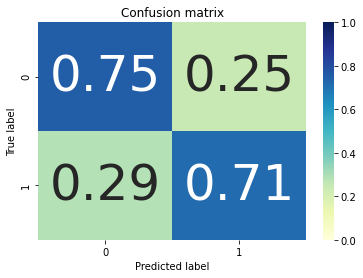

In [49]:
# Visualizing cm

cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

In [50]:

# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)



##Total averages :
print("")
print("The average TPR is:", TPR.sum()/2)
print("The average Precision is:", PPV.sum()/2)
print("The average False positive rate is:", FPR.sum()/2)
print("The average False Negative Rate is:", FNR.sum()/2)

The True Positive Rate is: [0.75288303 0.71487264]
The Precision is: [0.72482157 0.74358974]
The False positive rate is: [0.28512736 0.24711697]
The False Negative Rate is:  [0.24711697 0.28512736]

The average TPR is: 0.7338778344675039
The average Precision is: 0.7342056568860693
The average False positive rate is: 0.2661221655324961
The average False Negative Rate is: 0.2661221655324961


In [51]:
# Running Log loss on training
print("The Log Loss on Training is: ", log_loss(y_train, pred_proba))

# Running Log loss on testing
pred_proba_t = log_reg.predict_proba(X_test)
print("The Log Loss on Testing Dataset is: ", log_loss(y_test, pred_proba_t))

The Log Loss on Training is:  0.5314746721273563
The Log Loss on Testing Dataset is:  0.5516265266760505


# Hyper Parameter Tuning

In [52]:
# Looping over the parameters

C_List = np.geomspace(1e-5, 1e5, num=20)
CA = []
Logarithmic_Loss = []

for c in C_List:
    log_reg2 = LogisticRegression(random_state=10, solver = 'lbfgs', C=c)
    log_reg2.fit(X_train, y_train)
    score = log_reg2.score(X_test, y_test)
    CA.append(score)
    print("The CA of C parameter {} is {}:".format(c, score))
    pred_proba_t = log_reg2.predict_proba(X_test)
    log_loss2 = log_loss(y_test, pred_proba_t)
    Logarithmic_Loss.append(log_loss2)
    print("The Logg Loss of C parameter {} is {}:".format(c, log_loss2))
    print("")

The CA of C parameter 1e-05 is 0.6893491124260355:
The Logg Loss of C parameter 1e-05 is 0.6891070581437092:

The CA of C parameter 3.359818286283781e-05 is 0.6863905325443787:
The Logg Loss of C parameter 3.359818286283781e-05 is 0.6806287181854103:

The CA of C parameter 0.00011288378916846884 is 0.6878698224852071:
The Logg Loss of C parameter 0.00011288378916846884 is 0.6591405060261889:

The CA of C parameter 0.000379269019073225 is 0.6967455621301775:
The Logg Loss of C parameter 0.000379269019073225 is 0.6226402857284422:

The CA of C parameter 0.0012742749857031334 is 0.7071005917159763:
The Logg Loss of C parameter 0.0012742749857031334 is 0.5868582798843145:

The CA of C parameter 0.004281332398719391 is 0.7189349112426036:
The Logg Loss of C parameter 0.004281332398719391 is 0.5666068573865443:

The CA of C parameter 0.01438449888287663 is 0.7189349112426036:
The Logg Loss of C parameter 0.01438449888287663 is 0.559469579294994:

The CA of C parameter 0.04832930238571752 is 

In [53]:
# Another way of doing the above
# Scikit-learn offers a LogisticRegressionCV module which implements Logistic Regression 
# with builtin cross-validation to find out the optimal C parameter

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, random_state=0, shuffle=True)

# Logistic Reg CV
Log_reg3 = LogisticRegressionCV(random_state=15, Cs = C_List, solver ='lbfgs')
Log_reg3.fit(X_train, y_train)
print("The CA is:", Log_reg3.score(X_test, y_test))
pred_proba_t = Log_reg3.predict_proba(X_test)
log_loss3 = log_loss(y_test, pred_proba_t)
print("The Logistic Loss is: ", log_loss3)

print("The optimal C parameter is: ", Log_reg3.C_)

The CA is: 0.7174556213017751
The Logistic Loss is:  0.5559073333837677
The optimal C parameter is:  [0.0483293]


The CA of C parameter 1e-05 is 0.6893491124260355:
The Logg Loss of C parameter 1e-05 is 0.6891070581437092:



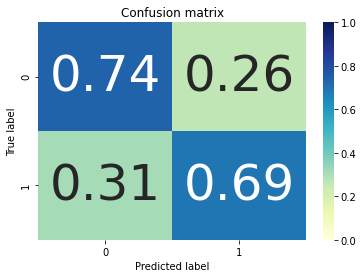

The CA of C parameter 3.359818286283781e-05 is 0.6863905325443787:
The Logg Loss of C parameter 3.359818286283781e-05 is 0.6806287181854103:



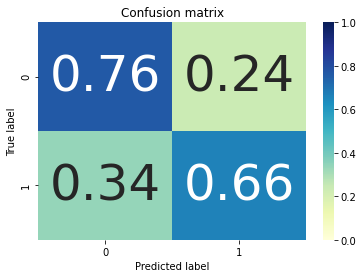

The CA of C parameter 0.00011288378916846884 is 0.6878698224852071:
The Logg Loss of C parameter 0.00011288378916846884 is 0.6591405060261889:



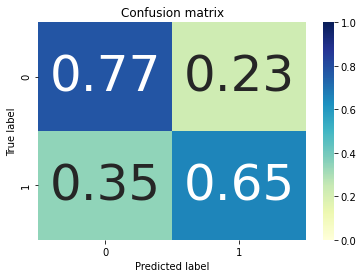

The CA of C parameter 0.000379269019073225 is 0.6967455621301775:
The Logg Loss of C parameter 0.000379269019073225 is 0.6226402857284422:



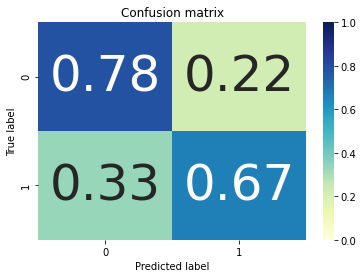

The CA of C parameter 0.0012742749857031334 is 0.7071005917159763:
The Logg Loss of C parameter 0.0012742749857031334 is 0.5868582798843145:



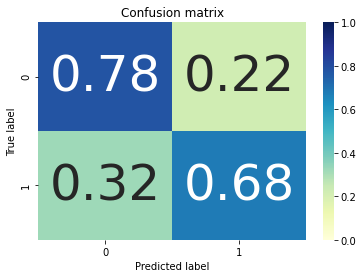

The CA of C parameter 0.004281332398719391 is 0.7189349112426036:
The Logg Loss of C parameter 0.004281332398719391 is 0.5666068573865443:



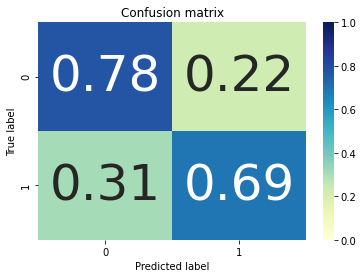

The CA of C parameter 0.01438449888287663 is 0.7189349112426036:
The Logg Loss of C parameter 0.01438449888287663 is 0.559469579294994:



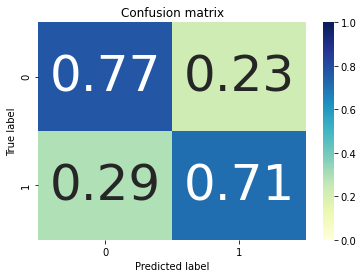

The CA of C parameter 0.04832930238571752 is 0.7174556213017751:
The Logg Loss of C parameter 0.04832930238571752 is 0.5559089816402966:



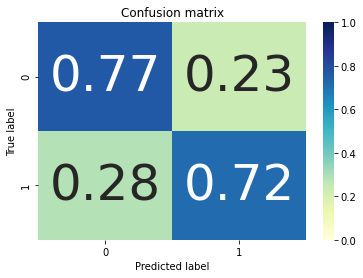

The CA of C parameter 0.1623776739188721 is 0.7144970414201184:
The Logg Loss of C parameter 0.1623776739188721 is 0.5532144139429863:



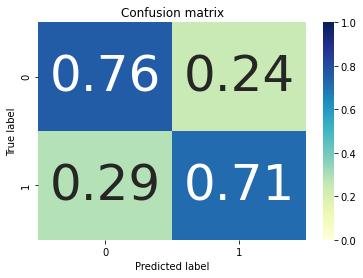

The CA of C parameter 0.5455594781168515 is 0.7144970414201184:
The Logg Loss of C parameter 0.5455594781168515 is 0.5519184820503346:



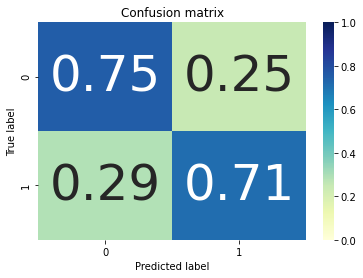

The CA of C parameter 1.8329807108324339 is 0.7159763313609467:
The Logg Loss of C parameter 1.8329807108324339 is 0.5514647381715325:



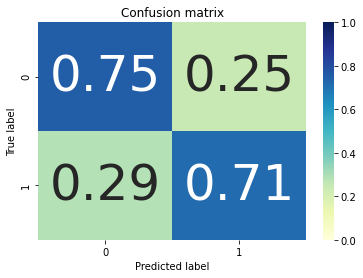

The CA of C parameter 6.1584821106602545 is 0.7159763313609467:
The Logg Loss of C parameter 6.1584821106602545 is 0.5513196043176779:



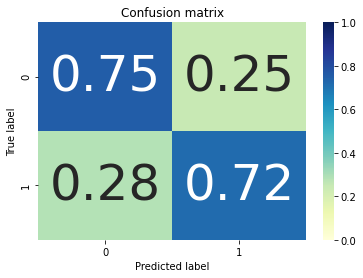

The CA of C parameter 20.6913808111479 is 0.7159763313609467:
The Logg Loss of C parameter 20.6913808111479 is 0.5512761802791796:



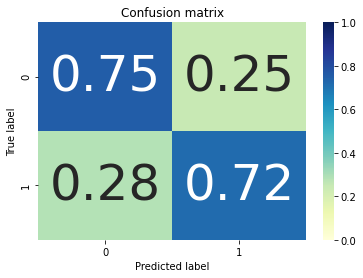

The CA of C parameter 69.51927961775606 is 0.7159763313609467:
The Logg Loss of C parameter 69.51927961775606 is 0.5512631921730983:



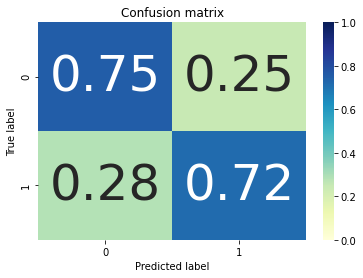

The CA of C parameter 233.57214690901213 is 0.7159763313609467:
The Logg Loss of C parameter 233.57214690901213 is 0.5512593207938078:



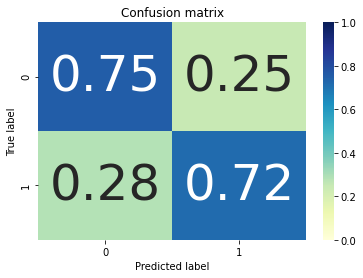

The CA of C parameter 784.7599703514607 is 0.7159763313609467:
The Logg Loss of C parameter 784.7599703514607 is 0.5512581680327296:



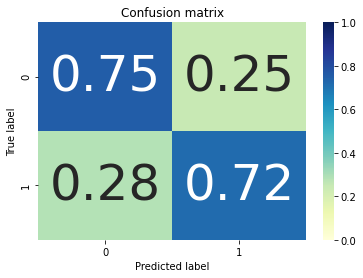

The CA of C parameter 2636.6508987303555 is 0.7159763313609467:
The Logg Loss of C parameter 2636.6508987303555 is 0.5512578248862186:



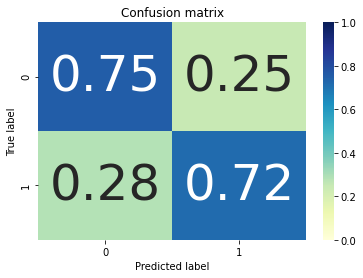

The CA of C parameter 8858.667904100832 is 0.7159763313609467:
The Logg Loss of C parameter 8858.667904100832 is 0.551257722749857:



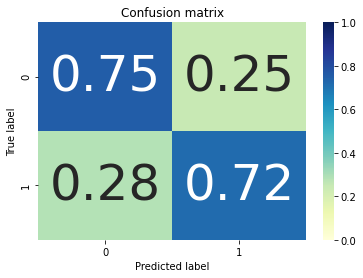

The CA of C parameter 29763.51441631313 is 0.7159763313609467:
The Logg Loss of C parameter 29763.51441631313 is 0.55125769235044:



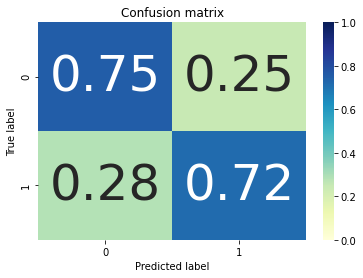

The CA of C parameter 100000.0 is 0.7159763313609467:
The Logg Loss of C parameter 100000.0 is 0.5512576833023124:



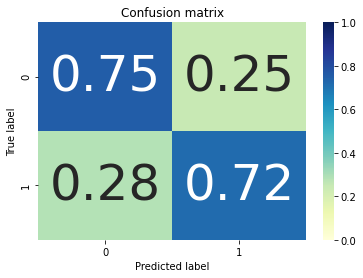

In [54]:
for c in C_List:
    log_reg2 = LogisticRegression(random_state=10, solver = 'lbfgs', C=c)
    log_reg2.fit(X_train, y_train)
    score = log_reg2.score(X_test, y_test)
    CA.append(score)
    print("The CA of C parameter {} is {}:".format(c, score))
    pred_proba_t = log_reg2.predict_proba(X_test)
    log_loss2 = log_loss(y_test, pred_proba_t)
    Logarithmic_Loss.append(log_loss2)
    print("The Logg Loss of C parameter {} is {}:".format(c, log_loss2))
    print("")
    
    y_pred = log_reg2.predict(X_train)
    cm = confusion_matrix(y_train, y_pred)
    cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
    plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')
    plt.show()